# Setup

In [1]:
from sklearn import datasets as ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = ds.fetch_openml(data_id=151,as_frame=True, return_X_y=True)

(

    pd.concat(df, axis=1)

    .assign(target=lambda x: (x['class']=='UP')*1)

)

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class,target
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP,1
1,0.0000,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP,1
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP,1
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP,1
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN,0
...,...,...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,DOWN,0
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,DOWN,0
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,DOWN,0
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,UP,1


In [2]:
prices = pd.concat(df,axis=1).assign(target=lambda x: (x['class']=='UP')*1)

# Informação das features


    Date: date between 7 May 1996 to 5 December 1998. Here normalized between 0 and 1
    Day: day of the week (1-7)
    Period: time of the measurement (1-48) in half hour intervals over 24 hours. Here normalized between 0 and 1
    NSWprice: New South Wales electricity price, normalized between 0 and 1
    NSWdemand: New South Wales electricity demand, normalized between 0 and 1
    VICprice: Victoria electricity price, normalized between 0 and 1
    VICdemand: Victoria electricity demand, normalized between 0 and 1
    transfer: scheduled electricity transfer between both states, normalized between 0 and 1
    The class label identifies the change of the price (UP or DOWN) in New South Wales relative to a moving average of the last 24 hours (and removes the impact of longer term price trends).

# Análise Exploratória

In [3]:
prices.shape

(45312, 10)

In [4]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   date       45312 non-null  float64 
 1   day        45312 non-null  category
 2   period     45312 non-null  float64 
 3   nswprice   45312 non-null  float64 
 4   nswdemand  45312 non-null  float64 
 5   vicprice   45312 non-null  float64 
 6   vicdemand  45312 non-null  float64 
 7   transfer   45312 non-null  float64 
 8   class      45312 non-null  category
 9   target     45312 non-null  int32   
dtypes: category(2), float64(7), int32(1)
memory usage: 2.7 MB


10 colunas, 2 das quais são class e target que são o que queremos descobrir.

In [5]:
prices.isnull().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
target       0
dtype: int64

In [6]:
prices.describe()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer,target
count,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000
mean,0.499080,0.500000,0.057868,0.425418,0.003467,0.422915,0.500526,0.424545
std,0.340308,0.294756,0.039991,0.163323,0.010213,0.120965,0.153373,0.494279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031934,0.250000,0.035127,0.309134,0.002277,0.372346,0.414912,0.000000
50%,0.456329,0.500000,0.048652,0.443693,0.003467,0.422915,0.414912,0.000000
75%,0.880547,0.750000,0.074336,0.536001,0.003467,0.469252,0.605702,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
prices['class'].value_counts()

DOWN    26075
UP      19237
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

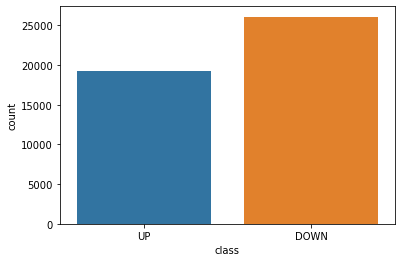

In [8]:
sns.countplot(data=prices,x='class')

Podemos observar que o dataset é balanceado em relação ao número de classes 'UP' e 'DOWN'.

O quão diferente são os valores de cada feature para as duas diferentes classes?

In [9]:
up = prices[prices['class'] == 'UP']
down = prices[prices['class'] == 'DOWN']

In [10]:
up.describe()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer,target
count,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.0
mean,0.496583,0.553289,0.075530,0.488914,0.004235,0.455898,0.478682,1.0
std,0.342675,0.257185,0.053228,0.140764,0.014735,0.117201,0.145280,0.0
min,0.000000,0.000000,0.025009,0.033472,0.000000,0.033661,0.000000,1.0
25%,0.031592,0.382979,0.045635,0.396311,0.002989,0.422915,0.414912,1.0
50%,0.456086,0.553191,0.073856,0.495240,0.003467,0.422915,0.414912,1.0
75%,0.880625,0.765957,0.089288,0.573788,0.004310,0.516572,0.557895,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.939035,1.0


In [11]:
down.describe()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer,target
count,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.0
mean,0.500922,0.460686,0.044838,0.378574,0.002900,0.398581,0.516642,0.0
std,0.338546,0.313915,0.017002,0.162994,0.004509,0.117898,0.157149,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006140,0.0
25%,0.424539,0.170213,0.030428,0.242190,0.002009,0.325997,0.414912,0.0
50%,0.456528,0.425532,0.042542,0.391848,0.003049,0.422915,0.415789,0.0
75%,0.880492,0.744681,0.054612,0.499405,0.003467,0.422915,0.637719,0.0
max,1.000000,1.000000,0.273118,0.904790,0.366515,0.991196,1.000000,0.0


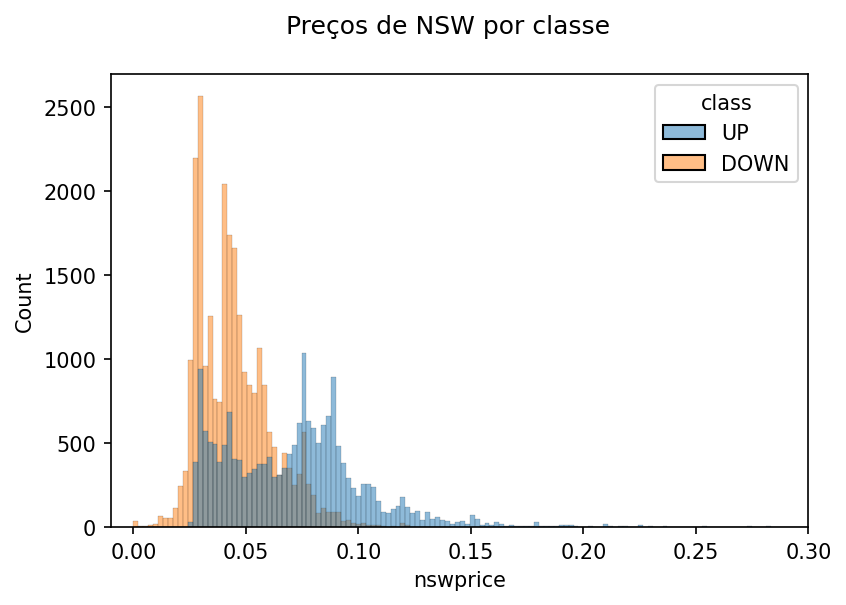

In [73]:
plt.figure(dpi=150)
plt.suptitle('Preços de NSW por classe')
sns.histplot(data=prices,x='nswprice',hue='class')
plt.xlim(-0.01,0.3);

Como se comportou o preço de NSW ao longo dos anos?

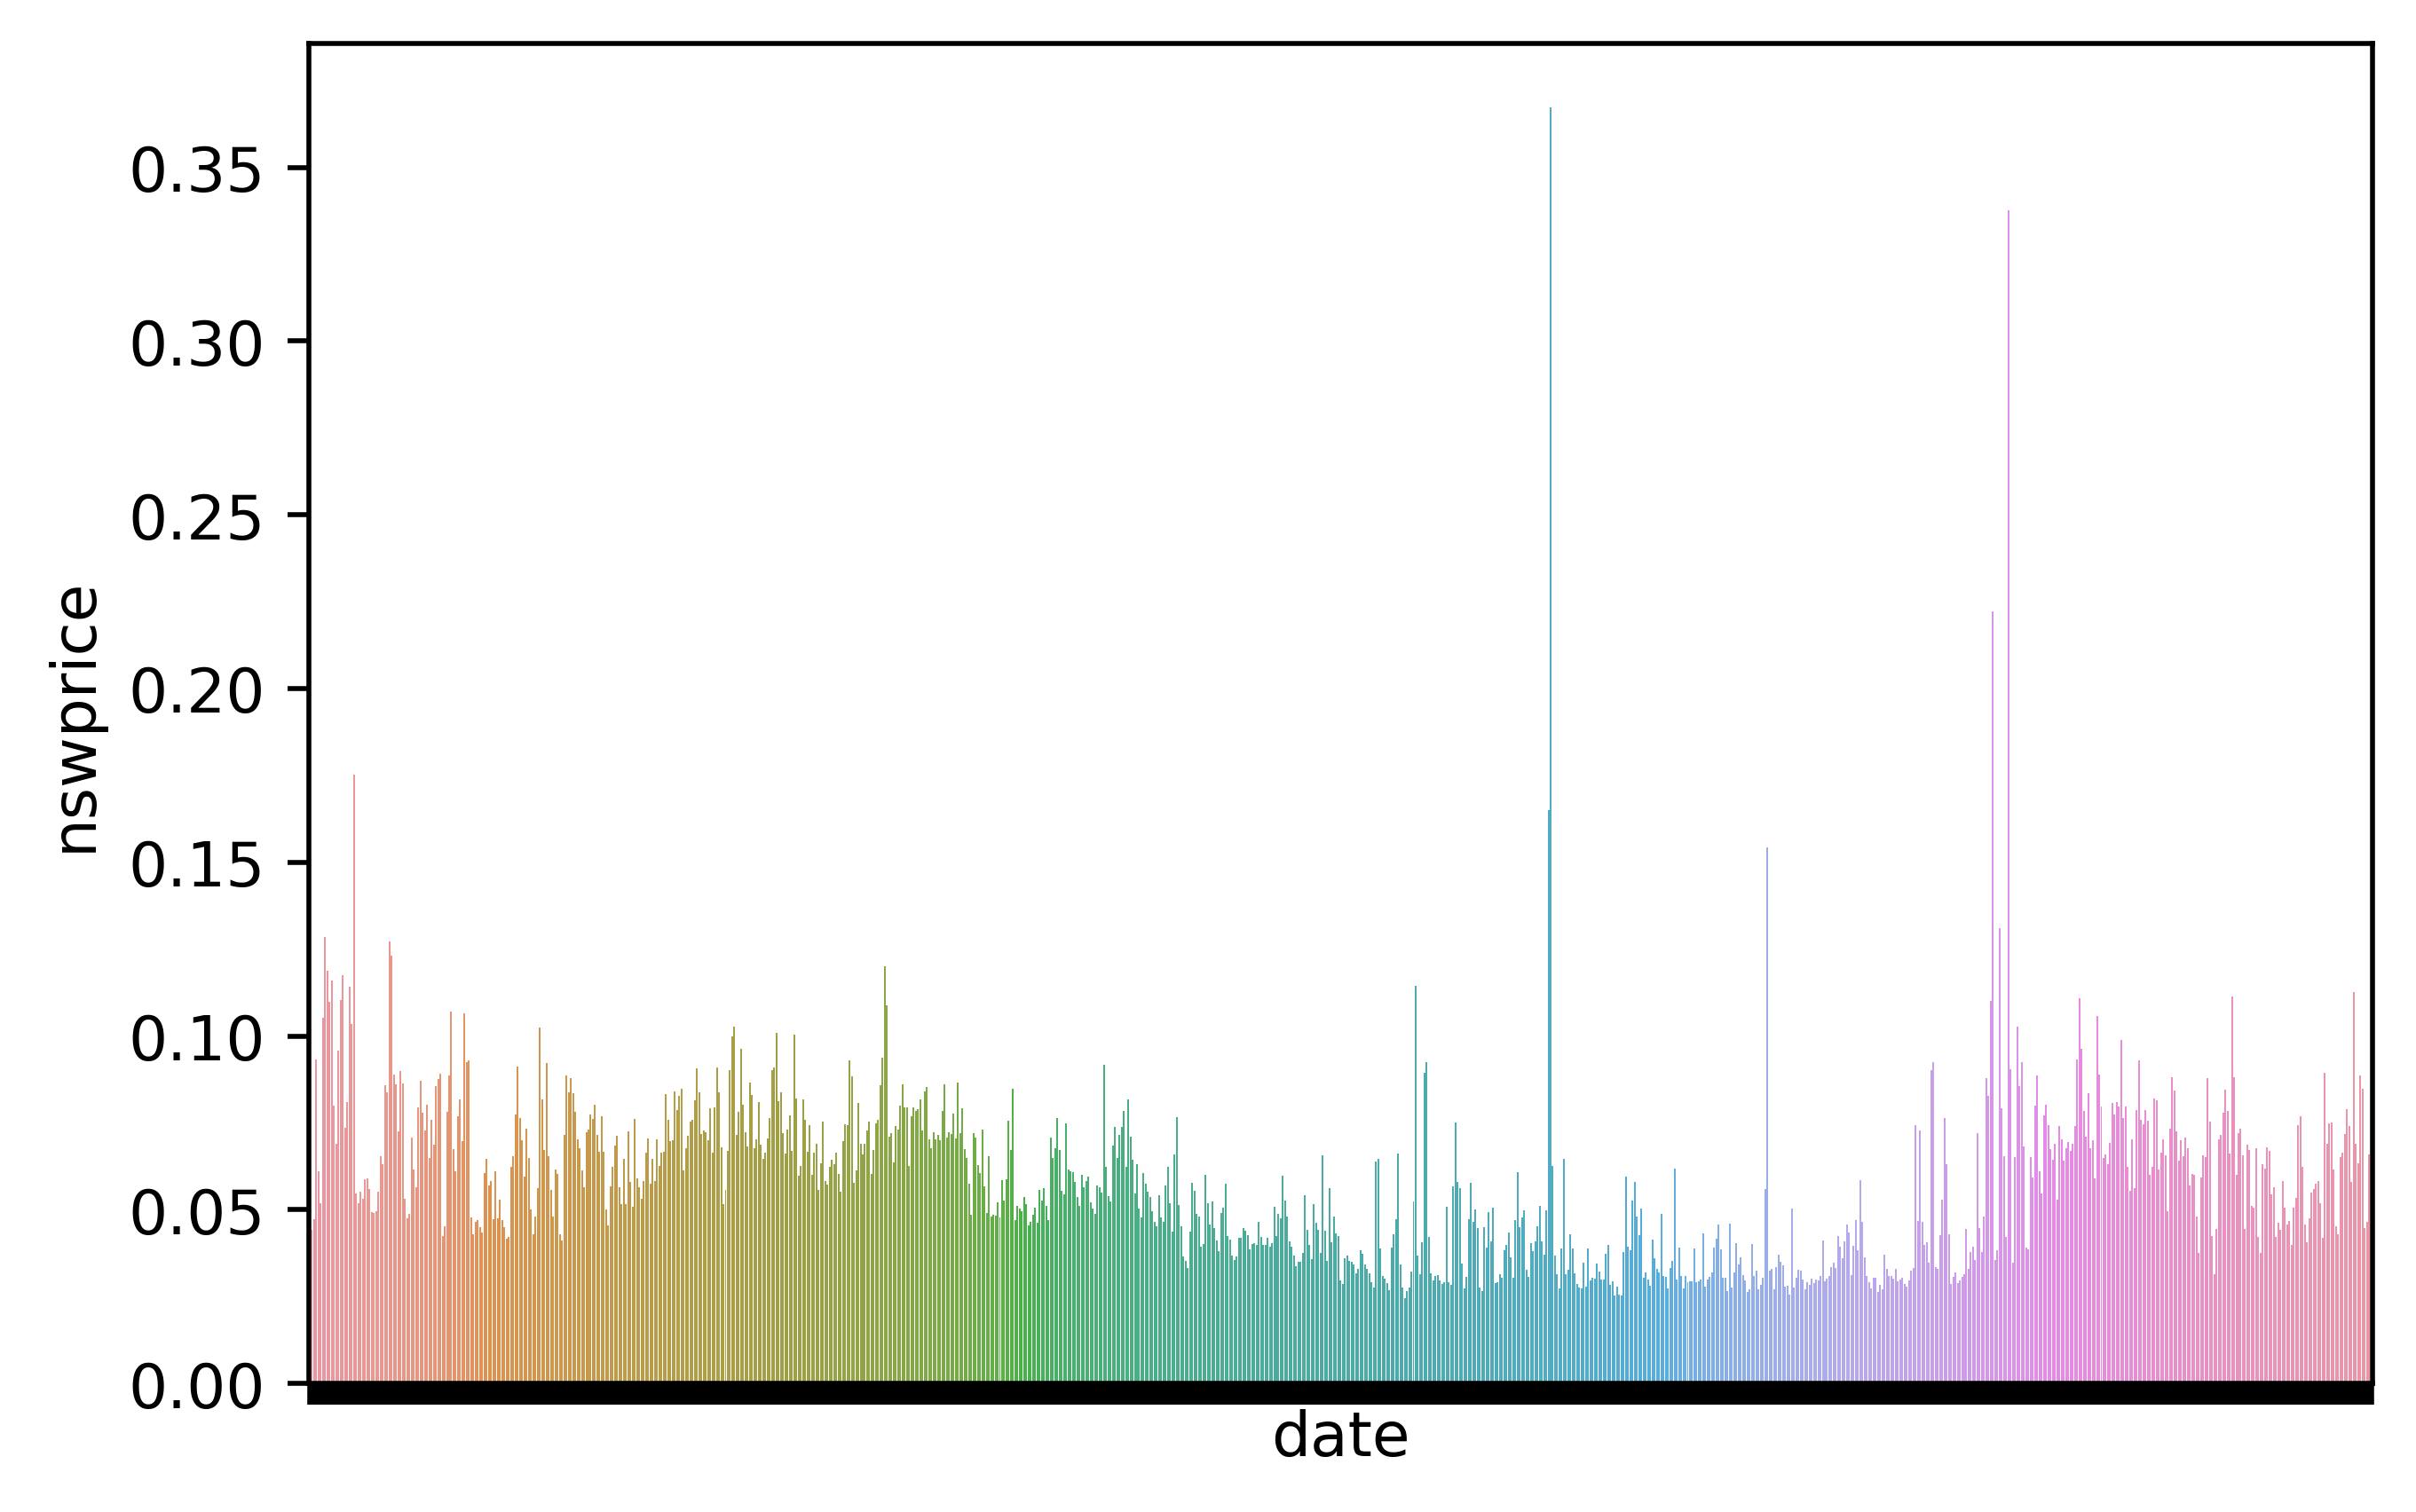

In [21]:
grouped_dates = prices.groupby('date').mean()['nswprice'].reset_index()
plt.figure(dpi=500)
sns.barplot(data=grouped_dates,x='date',y='nswprice')
plt.tick_params(labelbottom=False)

O preço não apresenta um aumento ou diminuição contínua ao longo dos anos.

## Como são as correlações entre as features do dataset?

<AxesSubplot:>

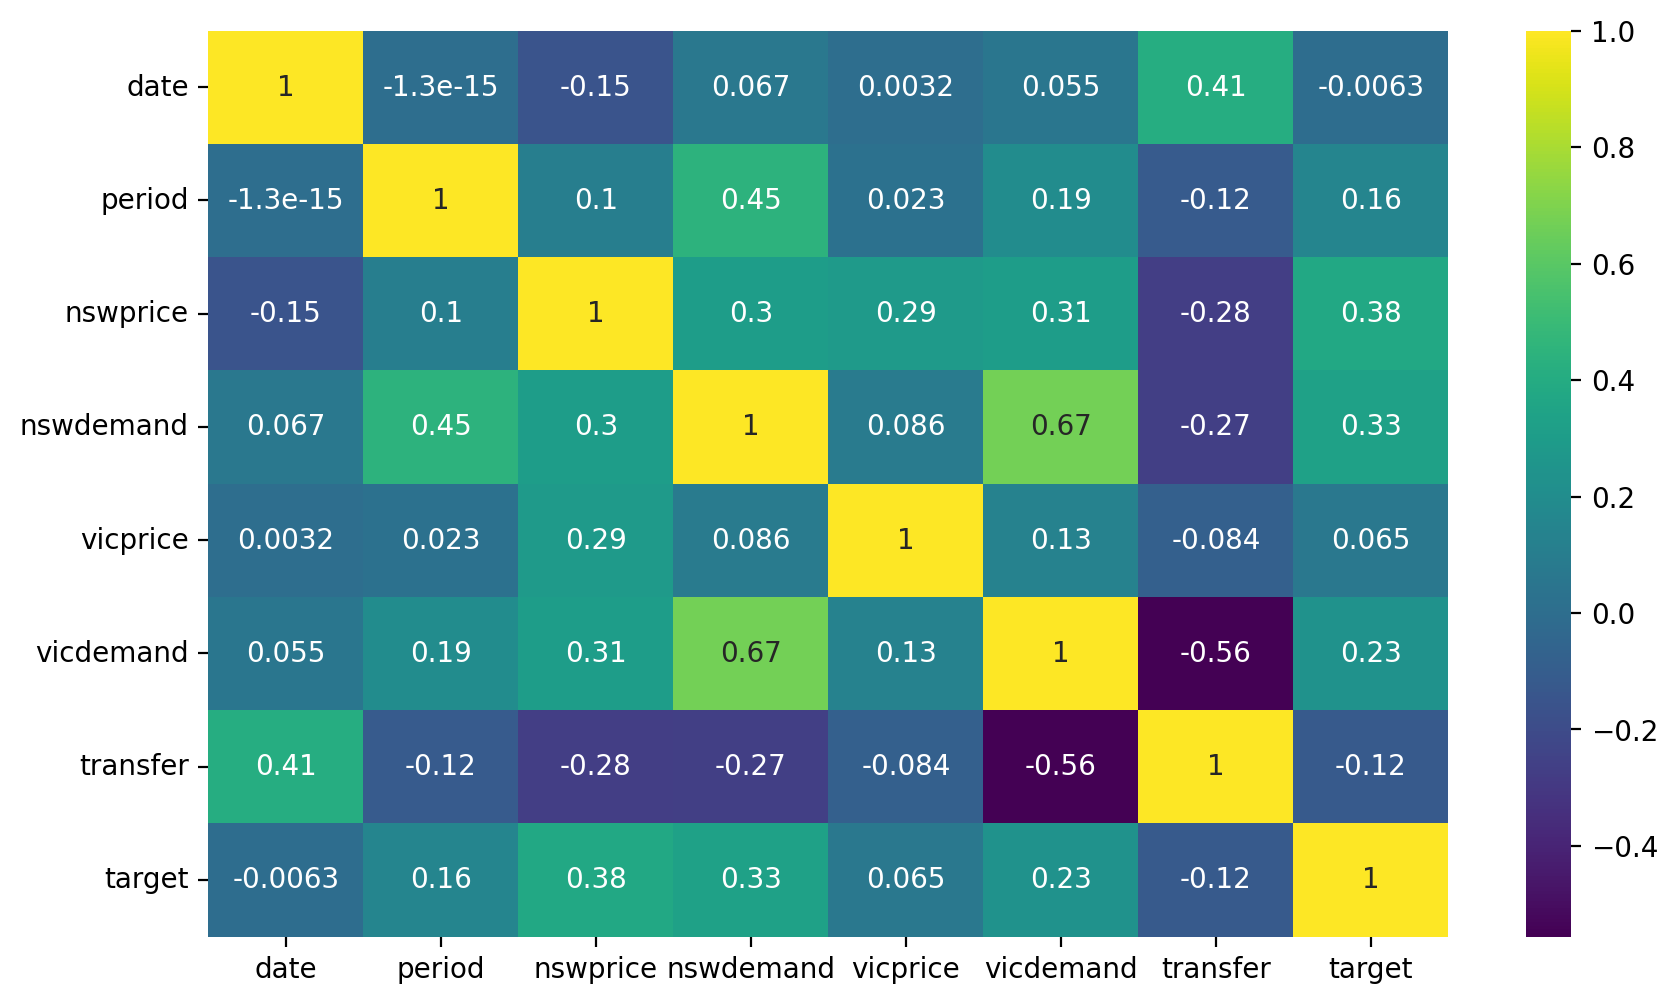

In [11]:
plt.figure(figsize=(10,6),dpi=200)
sns.heatmap(prices.corr(),annot=True,cmap='viridis')

A demanda em NSW tem uma correlação relativamente alta com a demanda em Victoria. Vamos verificar essa relação graficamente:

<AxesSubplot:xlabel='nswdemand', ylabel='vicdemand'>

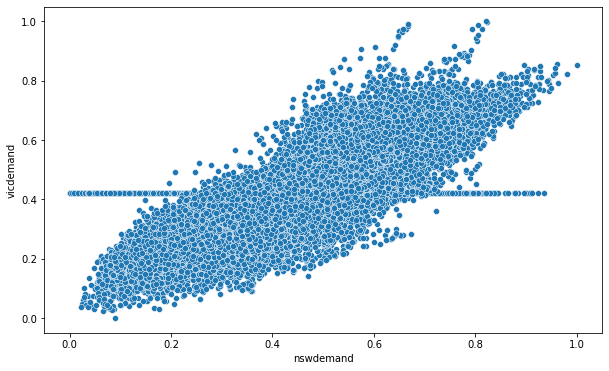

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=prices,x='nswdemand',y='vicdemand')

O crescimento da demanda em NSW é acompanhado pelo crescimento da demanda em Victoria.

A demanda em Victoria também tem uma correlação alta com a transferência de eletricidade entre as cidades:

<AxesSubplot:xlabel='vicdemand', ylabel='transfer'>

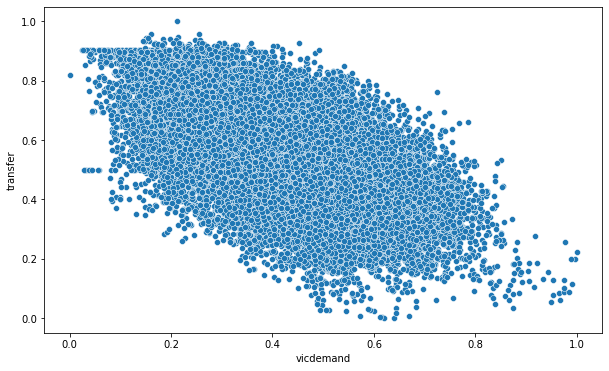

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=prices,x='vicdemand',y='transfer')

Conforme a demanda em Victoria aumenta, a transferência programada diminui.

Vamos verificar agora como a demanda das duas cidades se comporta de acordo com o período do dia:

In [94]:
prices['Hora do Dia'] = round(prices['period']*24,2)

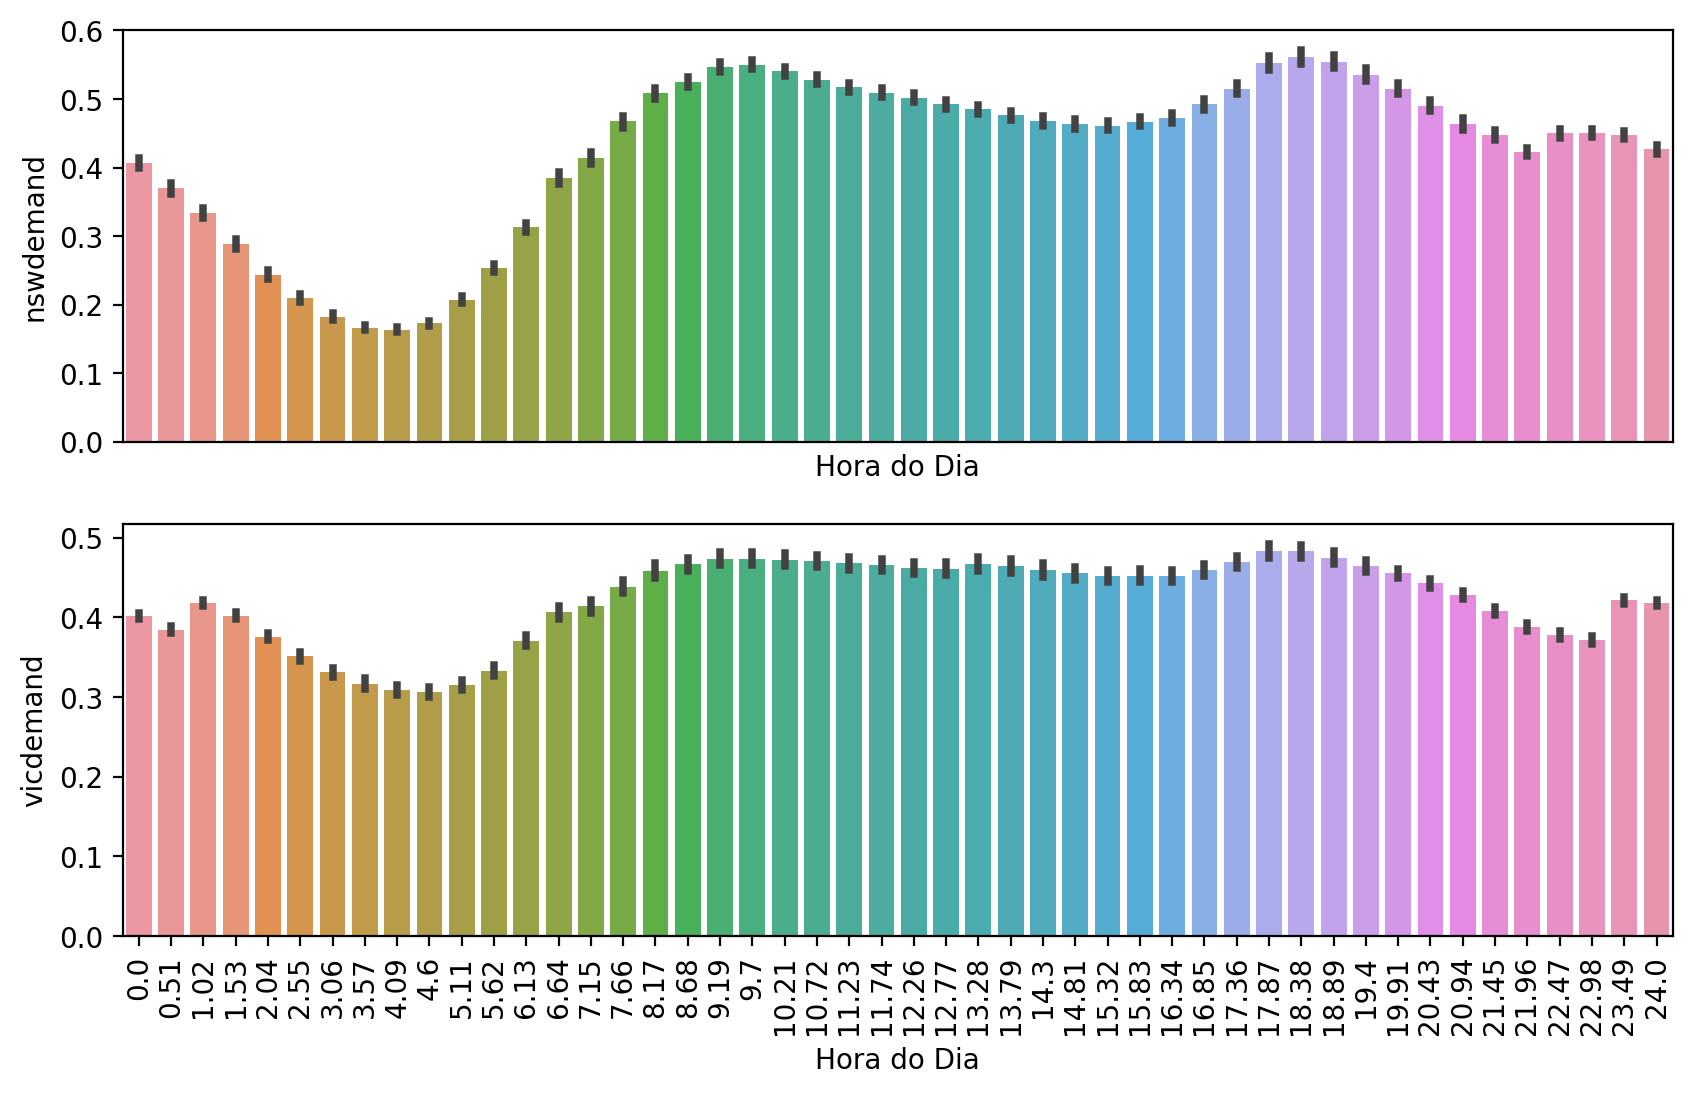

In [95]:
plt.figure(figsize=(10,6),dpi=200)
plt.subplot(2,1,1)
sns.barplot(data=prices,x='Hora do Dia',y='nswdemand')
plt.tick_params(bottom=False,labelbottom=False)
plt.subplot(2,1,2)
sns.barplot(data=prices,x='Hora do Dia',y='vicdemand')
plt.xticks(rotation=90);

A demanda tem um comportamento similar ao longo do período do dia nas duas cidades.

Será que a demanda também se comporta do mesmo jeito nas duas cidades de acordo com o dia da semana?

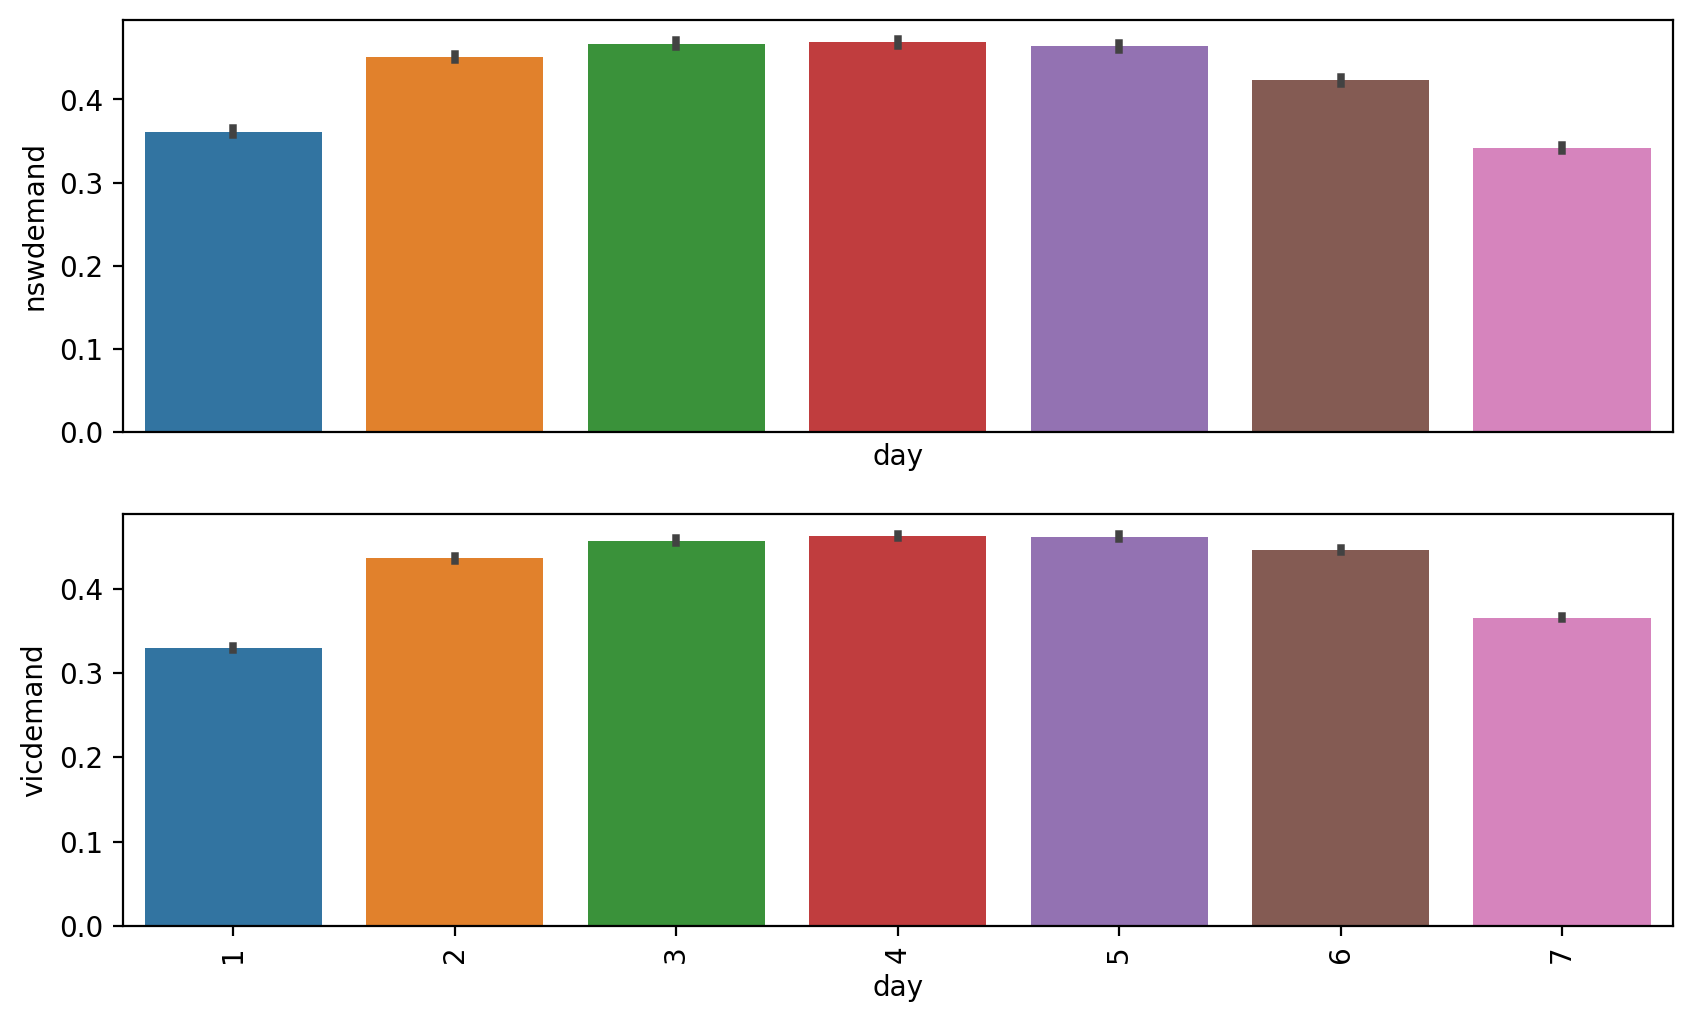

In [41]:
plt.figure(figsize=(10,6),dpi=200)
plt.subplot(2,1,1)
sns.barplot(data=prices,x='day',y='nswdemand')
plt.tick_params(bottom=False,labelbottom=False)
plt.subplot(2,1,2)
sns.barplot(data=prices,x='day',y='vicdemand')
plt.xticks(rotation=90);

# Preparando os dados e escolhendo o modelo

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

Primeiro vamos separar o dataset em nossas features (X) e nossos labels (y):

In [33]:
X = prices.drop(['class','target','Hora do Dia'],axis=1)
y = prices['target']

Agora vamos transformar a nossa feature categórica em dummy:

In [34]:
X = pd.get_dummies(X,drop_first=True)

Vamos separar o data set em 3: train, validation, e holdout_test. Para que o ajuste dos parâmetros seja feito no set de validação e o teste seja feito em um conjunto de dados nunca visto.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
X_validation, X_holdout_test, y_validation, y_holdout_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

Agora vamos avaliar como cada modelo de classificação performa no nosso dataset utilizando os parâmetros base e utilizando a acurácia como métrica:

In [37]:
classifiers = []

model1 = LogisticRegressionCV()
classifiers.append(model1)

model2 = DecisionTreeClassifier()
classifiers.append(model2)

model3 = RandomForestClassifier()
classifiers.append(model3)

model4 = SVC()
classifiers.append(model4)

model5 = KNeighborsClassifier()
classifiers.append(model5)

In [38]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_validation)
    acc = accuracy_score(y_validation, y_pred)
    print("Acurácia de %s: %s"%(clf, acc))
    cm = confusion_matrix(y_validation, y_pred)
    print("Matriz de confusão de %s: %s"%(clf, cm))

Acurácia de LogisticRegressionCV(): 0.7663675150801824
Matriz de confusão de LogisticRegressionCV(): [[3385  531]
 [1057 1824]]
Acurácia de DecisionTreeClassifier(): 0.8765631896424894
Matriz de confusão de DecisionTreeClassifier(): [[3490  426]
 [ 413 2468]]
Acurácia de RandomForestClassifier(): 0.9098131528615566
Matriz de confusão de RandomForestClassifier(): [[3655  261]
 [ 352 2529]]
Acurácia de SVC(): 0.7875533323525085
Matriz de confusão de SVC(): [[3459  457]
 [ 987 1894]]
Acurácia de KNeighborsClassifier(): 0.8074150360453141
Matriz de confusão de KNeighborsClassifier(): [[3320  596]
 [ 713 2168]]


No nosso caso os modelos de Random Forests e Árvore simples tiveram a melhor performance com base na acurácia.

Vamos optar por usar o modelo de Random Forests e buscar por parâmetros que otimizem seu resultado inicial.

# Escolha dos parâmetros (RFC)

Primeiro vamos verificar como o número mínimo de amostras para dividir um nó afeta nosso resultado:

In [41]:
min_samples_split = [2, 5, 10, 15, 100]
accuracy_splits = []

for n in min_samples_split:
 
    rfc = RandomForestClassifier(min_samples_split=n)
    rfc.fit(X_train,y_train)
    rfc_preds = rfc.predict(X_validation)
    accuracy_splits.append(accuracy_score(rfc_preds,y_validation))

Text(0.5, 0, 'Número de amostras')

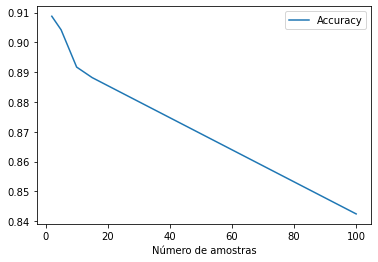

In [101]:
plt.plot(min_samples_split,test_error_splits,label='Accuracy')
plt.legend()
plt.xlabel('Número de amostras')

Nesse caso o valor default de '2' apresentou a maior acurácia nos resultados.

Agora vamos ver como o número mínimo de amostras necessárias para estar em um nó da folha afeta os resultados:

In [46]:
min_samples_leaf = [1, 2, 5, 10]
accuracy_leaf = []

for n in min_samples_leaf:
 
    rfc = RandomForestClassifier(min_samples_leaf=n)
    rfc.fit(X_train,y_train)
    rfc_preds = rfc.predict(X_validation)
    accuracy_leaf.append(accuracy_score(rfc_preds,y_validation))

Text(0.5, 0, 'Número de amostras')

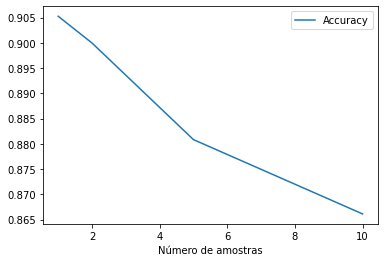

In [102]:
plt.plot(min_samples_leaf,accuracy_leaf,label='Accuracy')
plt.legend()
plt.xlabel('Número de amostras')

Do mesmo jeito que o caso anterior, o valor default de '1' apresentou o melhor valor de acurácia.

Como será que o número de árvores afeta o resultado?

In [48]:
n_estimator = [50, 100, 300, 500, 600, 700, 800, 1000]
accuracy_estimators = []

for n in n_estimator:
 
    rfc = RandomForestClassifier(n_estimators=n)
    rfc.fit(X_train,y_train)
    rfc_preds = rfc.predict(X_validation)
    accuracy_estimators.append(accuracy_score(rfc_preds,y_validation))

Text(0.5, 0, 'Número de árvores')

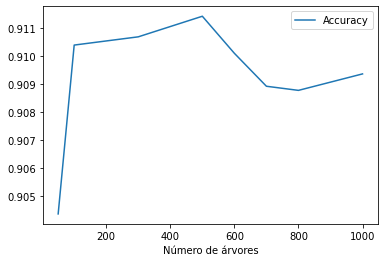

In [49]:
plt.plot(n_estimator,accuracy_estimators,label='Accuracy')
plt.legend()
plt.xlabel('Número de árvores')

Podemos ver que a acurácia aumenta até o valor de 500 estimadores e depois cai novamente.

Por fim, vamos avaliar como a profundidade das árvores afeta o resultado:

In [50]:
max_depths = [ 5, 8, 15, 25, 30, 40, 50, 60]
accuracy_depth = []

for n in max_depths:
 
    rfc = RandomForestClassifier(max_depth=n)
    rfc.fit(X_train,y_train)
    rfc_preds = rfc.predict(X_validation)
    accuracy_depth.append(accuracy_score(rfc_preds,y_validation))

Text(0.5, 0, 'Profundidade máxima')

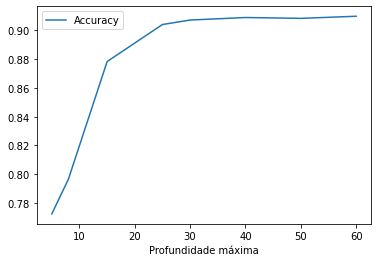

In [52]:
plt.plot(max_depths,accuracy_depth,label='Accuracy')
plt.legend()
plt.xlabel('Profundidade máxima')

O valor da acurácia tem um aumento até o valor de 30 para profundidade máxima e depois se mantém estabilizado.

Vamos criar um modelo com os parâmetros que tiveram a melhor performance:

    min_samples_split: 2
    min_samples_leaf: 1
    n_estimators: 500
    max_depth: 30

In [53]:
rfc = RandomForestClassifier(min_samples_split=2,min_samples_leaf=1,n_estimators=500,max_depth=30)

In [54]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, n_estimators=500)

Vamos agora avaliar como o nosso modelo performa no nosso set de teste:

In [55]:
rfc_pred = rfc.predict(X_holdout_test)

In [56]:
print(classification_report(y_holdout_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3897
           1       0.90      0.87      0.89      2900

    accuracy                           0.90      6797
   macro avg       0.90      0.90      0.90      6797
weighted avg       0.90      0.90      0.90      6797



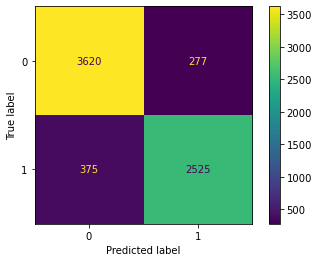

In [57]:
plot_confusion_matrix(rfc,X_holdout_test,y_holdout_test)

Vamos verificar a importância de cada feature para a previsão do modelo:

<AxesSubplot:xlabel='index', ylabel='Feature Importance'>

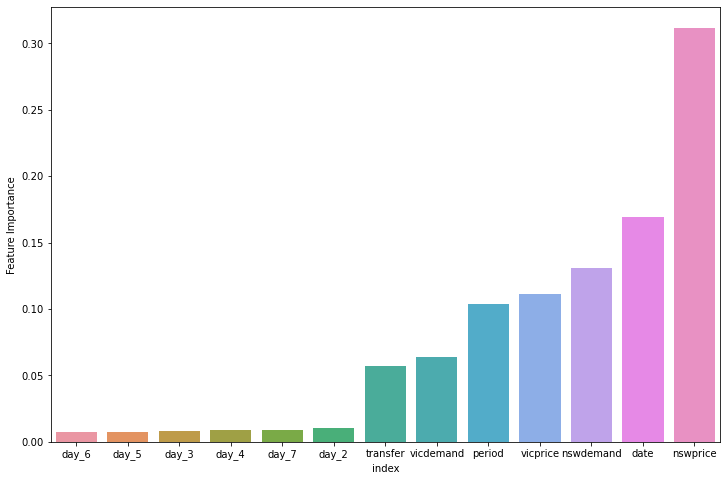

In [104]:
feats_df = pd.DataFrame(index=X.columns,data=rfc.feature_importances_,columns=['Feature Importance'])
sorted_feats = feats_df.sort_values('Feature Importance').reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sorted_feats,x='index',y='Feature Importance')

Podemos ver que o preço da eletricidade em NSW foi a feature mais importante na previsão do aumento ou redução do preço.

Vamos agora analisar qual seria a performance do modelo base (com todos parâmetros default) no set de teste e comparar os dois.

In [62]:
base_rfc = RandomForestClassifier()

In [63]:
base_rfc.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
base_rfc_pred = base_rfc.predict(X_holdout_test)

In [65]:
print(classification_report(y_holdout_test,base_rfc_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3897
           1       0.90      0.86      0.88      2900

    accuracy                           0.90      6797
   macro avg       0.90      0.89      0.90      6797
weighted avg       0.90      0.90      0.90      6797



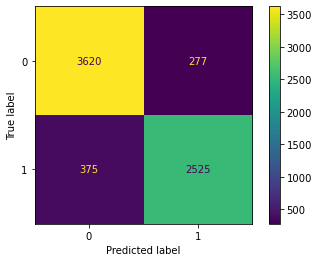

In [66]:
plot_confusion_matrix(rfc,X_holdout_test,y_holdout_test)

O modelo base apresentou a mesma acurácia do anterior, porém com uma precisão e recall 0.01 menores para a classe 'UP'.

Vamos comparar também a importância de features no modelo base:

<AxesSubplot:xlabel='index', ylabel='Feature Importance'>

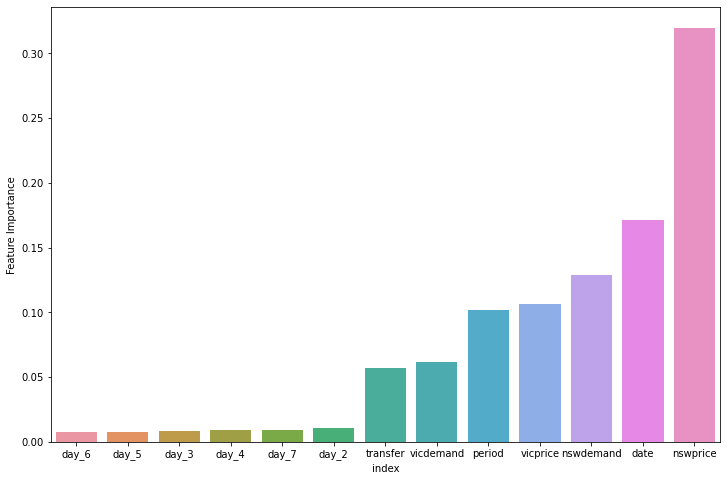

In [103]:
base_feats_df = pd.DataFrame(index=X.columns,data=base_rfc.feature_importances_,columns=['Feature Importance'])
base_sorted_feats = base_feats_df.sort_values('Feature Importance').reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=base_sorted_feats,x='index',y='Feature Importance')

### Conclusões

A importância de cada feature foi a mesma para os dois modelos. Com o preço da eletricidade em NSW sendo o fator mais importante para a previsão.

Também é possível notar que o dia da semana não apresenta tanta relevância na previsão do modelo.

O modelo base (com os parâmetros default) teve uma performance muito boa, visto que a melhora nos resultados não foi grande. O que pode não justificar o aumento no custo computacional.

### Trabalhos Futuros

Desenvolver um modelo sem a utilização da informação de data para verificar se é possível fazer a previsão da classe sem esse dado.